Examen
-Herrrera Monteza

### 1
Un fenómeno físico es governado por la ecuación:
$$ \dfrac{dv}{dt} = 0.2v-2\cos(2t)v^2 $$
sujeta a las siguientes condiciones:
$$ v(0)=0 $$

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style            # Libreria para estilos de graficos
plt.style.use(['science', 'notebook']) 

In [33]:
# definimos una función:
def vel(v,t):
    return 0.2*v-2*np.cos(2*t)*v**2

In [40]:
def runge_kutta(funcion, h, vo, v = None):
    if v is None:
        v = [vo]
    tiempo = np.arange(0,7,h)
    for i in range(len(tiempo)-1):
        k1 = h*funcion(v[i],tiempo[i])
        k2 = h*funcion(v[i]+0.5*k1,tiempo[i]+0.5*h)
        k3 = h*funcion(v[i]+0.5*k2,tiempo[i]+0.5*h)
        k4 = h*funcion(v[i]+k3,tiempo[i]+h)
        v.append(v[i]+(k1+2*k2+2*k3+k4)/6)
    return v, tiempo

C:\Users\JHERSO~1\AppData\Local\Temp/ipykernel_15460/538007672.py:3: RuntimeWarning: overflow encountered in double_scalars
  return 0.2*v-2*np.cos(2*t)*v**2
C:\Users\JHERSO~1\AppData\Local\Temp/ipykernel_15460/538007672.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return 0.2*v-2*np.cos(2*t)*v**2
C:\Users\JHERSO~1\AppData\Local\Temp/ipykernel_15460/538007672.py:3: RuntimeWarning: overflow encountered in double_scalars
  return 0.2*v-2*np.cos(2*t)*v**2
C:\Users\JHERSO~1\AppData\Local\Temp/ipykernel_15460/538007672.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return 0.2*v-2*np.cos(2*t)*v**2
C:\Users\JHERSO~1\AppData\Local\Temp/ipykernel_15460/538007672.py:3: RuntimeWarning: overflow encountered in double_scalars
  return 0.2*v-2*np.cos(2*t)*v**2
C:\Users\JHERSO~1\AppData\Local\Temp/ipykernel_15460/538007672.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return 0.2*v-2*np.cos(2*t)*v**2
C:\Users\JHERSO~1\AppData\Local\Temp/

(0.0, 1.7, 0.0, 2.0)

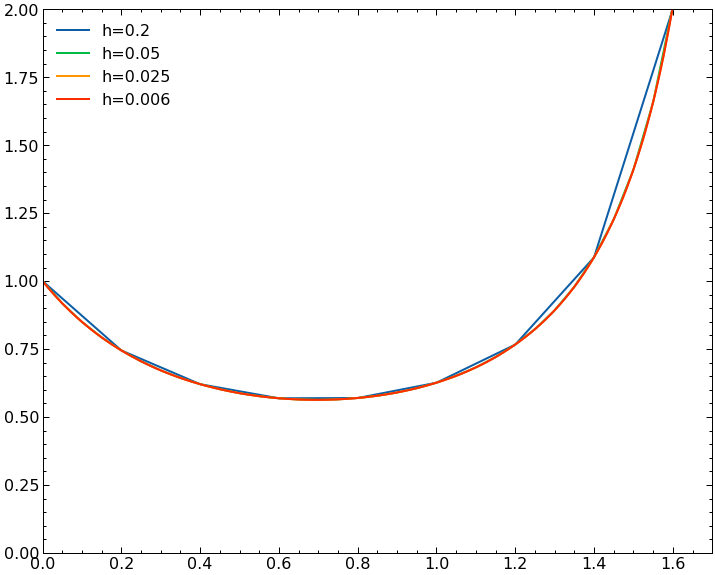

In [49]:
ax1 = plt.figure(figsize=(12,10))
for h in [0.2, 0.05, 0.025, 0.006]:
    v, tiempo = runge_kutta(vel, h, 1)
    plt.plot(tiempo,v,label=f'h={h}')
    plt.legend()
plt.axis([0,1.7,0,2])


### 2
$$ y^{\prime } = \frac{2}{t}y+t^2 e^t $$

$1 \leq t \leq 2 \ \ \ \ \ \ \ \ y(1)=0$

Con Euler Mejorado para $h = 0.1$ y $h = 0.01$

In [66]:
# Definimos una función que devuelve los valores de x e y
def eulerMejorado(funcion2, h, y1, y= None):
    if y is None:
        y = [y1]
    tiempo = np.arange(1,2,h)
    for i in range(len(tiempo)-1): # Iteramos el numero de iteraciones
        y.append(y[i] + h*funcion2(y[i],tiempo[i]))
    return y, tiempo

In [67]:
def fun2(y,t):
    return 2*y/t+t**2 *np.exp(t)

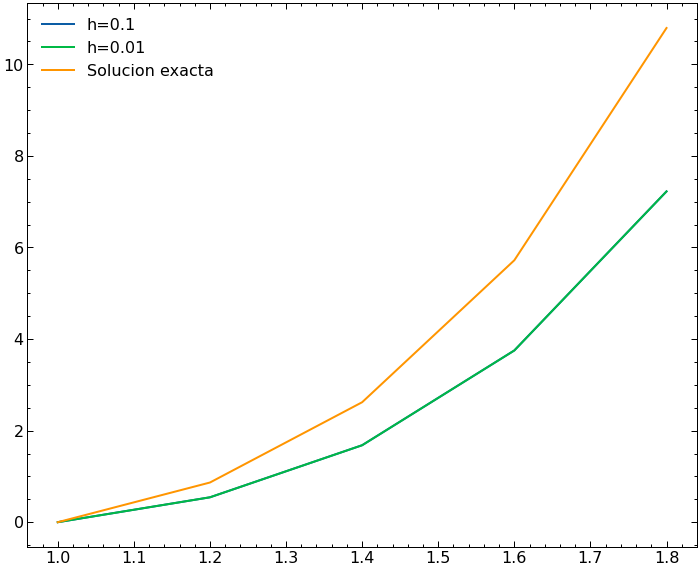

In [72]:


axj = plt.figure(figsize=(12,10))
for h in [0.1, 0.01]:
    y, ti = eulerMejorado(fun2, 0.2, 0)
    plt.plot(ti,y,label=f'h={h}')
# Solucion exacta 
ex = ti**2*(np.exp(ti)-np.exp(1))
plt.plot(ti,ex,label='Solucion exacta')
plt.legend()

## 3

$$ u^{\prime \prime}  + e^{-t/10}u = 0$$
$$ u^{\prime \prime}=  - e^{-t/10}u $$
$$ u^{\prime} = z$$
$$ z^{\prime} = - e^{-t/10}u$$

In [76]:
def fun33(z,u,t):
    dudt = z
    dzdt = -np.exp(-t/10)*u
    return dudt, dzdt

In [114]:
def runge_kutta_pendulo( funcion, zo, uo, z = None, u = None):
    # Se hace esto para que al llamar la función se cree una nueva lista, y además sea reutiizable por otras porciones de código
    if u is None:
        u = [uo]     # thetao es la posición inicial del péndulo
    if z is None:
        z = [zo]             # zo es la velocidad inicial de la masa
    h = 0.1
    tiempo = np.arange(0, 200, h)                                 # Se crea una lista de tiempos con tmenor igual a 6 como indica el problema
    for i in range(len(tiempo)-1):
        k1, l1 = funcion(z[i], u[i], tiempo[i])    # Se llama a la fución del sistema 
        k1 = h*k1       # se multiplica por h
        l1 = h*l1       # se multiplica por h
        k2, l2 = funcion(z[i]+0.5*k1, u[i]+0.5*l1, tiempo[i]+0.5*h)
        k2, l2 = h*k2, h*l2
        k3, l3 = funcion(z[i]+0.5*k2, u[i]+0.5*l2, tiempo[i]+0.5*h)
        k3, l3 = h*k3, h*l3
        k4, l4 = funcion(z[i]+k3, u[i]+l3, tiempo[i]+h)
        k4, l4 = h*k4, h*l4
        
        u.append(u[i]+(k1+2*k2+2*k3+k4)/6)
        z.append(z[i]+(l1+2*l2+2*l3+l4)/6)
        
    return u, tiempo                             # se devuelven las listas de theta y z
    

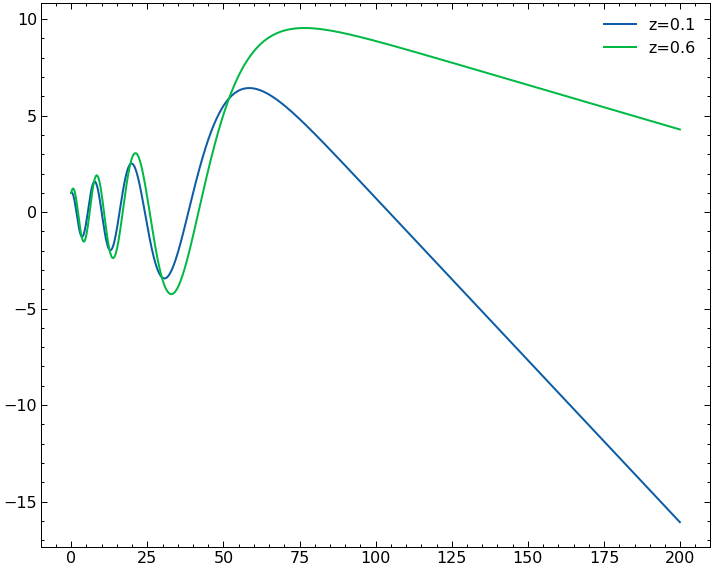

In [115]:
axj = plt.figure(figsize=(12,10))
for zoo in [0.1, 0.6]:
    u,tiempo = runge_kutta_pendulo(fun33, zoo, 1, z = None, u = None)
    plt.plot(tiempo,u,label=f'z={zoo}')

plt.legend()
